In [10]:
%matplotlib notebook
from pylab import *
import pandas as pd
fnm = 'LWA-OVRO-352  2020MAY05 new numbering.xlsx'
sheet_data = pd.read_excel(fnm, sheet_name='Sheet1', header = 3)
#sheet_data[0]
print sheet_data.columns
print sheet_data['antenna #']


Index([u'antenna #', u'X', u'Y', u'Z', u'Radius', u'origin', u'medium'], dtype='object')
0        LWA-1
1        LWA-2
2        LWA-3
3        LWA-4
4        LWA-5
5        LWA-6
6        LWA-7
7        LWA-9
8       LWA-10
9       LWA-11
10      LWA-12
11      LWA-13
12      LWA-14
13      LWA-15
14      LWA-17
15      LWA-18
16      LWA-19
17      LWA-20
18      LWA-21
19      LWA-22
20      LWA-23
21      LWA-24
22      LWA-25
23      LWA-26
24      LWA-27
25      LWA-28
26      LWA-29
27      LWA-30
28      LWA-31
29      LWA-32
        ...   
322    LWA-342
323    LWA-343
324    LWA-344
325    LWA-347
326    LWA-348
327    LWA-349
328    LWA-350
329    LWA-351
330    LWA-352
331    LWA-293
332    LWA-294
333    LWA-303
334    LWA-304
335    LWA-317
336    LWA-318
337    LWA-345
338    LWA-346
339    LWA-353
340    LWA-354
341    LWA-355
342    LWA-356
343    LWA-357
344    LWA-358
345    LWA-359
346    LWA-360
347    LWA-361
348    LWA-362
349    LWA-363
350    LWA-364
351    LWA-

In [11]:
'''
Read in the antenna positions.
'''
x_ant = np.array(sheet_data['X'])[:-1] # omit last entry because it is the 40-m dish antenna
y_ant = np.array(sheet_data['Y'])[:-1] # omit last entry because it is the 40-m dish antenna
id_ant = []
id_count = []
cc=0
for k in range(len(sheet_data['antenna #'])-1): # omit last entry because it is the 40-m dish antenna
    #print k, sheet_data['antenna #'][k].split('-')[-1]
    id_count.append(k)
    id_ant.append(int(sheet_data['antenna #'][k].split('-')[-1]))

id_ant = np.array(id_ant) 
print 'len(x_ant), len(y_ant), len(id_ant), len(id_count)', len(x_ant), len(y_ant), len(id_ant), len(id_count)

len(x_ant), len(y_ant), len(id_ant), len(id_count) 351 351 351 351


<IPython.core.display.Javascript object>


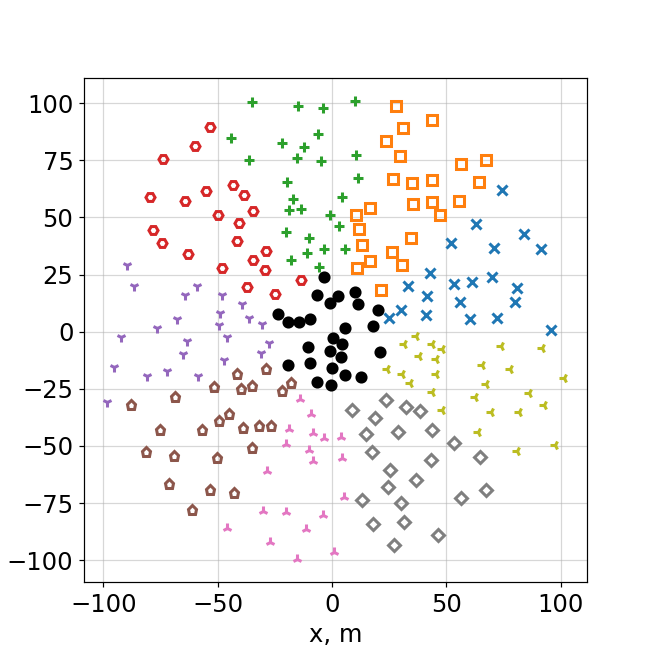

FPGA, Number of core antennas
0 26
1 21
2 25
3 27
4 22
5 24
6 24
7 20
8 23
9 26
10 0

Core Total: 238
Total: 351

Antenna ids by FPGA number
0 [ 76  79  81 108 109 110 111 112 113 114 115 116 117 118 119 120 143 145
 146 147 148 149 150 172 174 178]
1 [ 3  4  5  6  7  9 10 11 12 13 14 15 42 43 44 45 46 47 74 77 78]
2 [  1   2  33  34  35  36  37  38  39  40  41  65  66  67  68  69  70  71
  72  73  75 101 104 105 107]
3 [ 97  98  99 100 102 103 106 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 161 162 163 164 166 194]
4 [144 165 167 168 169 170 171 193 195 196 197 198 200 201 202 203 204 225
 226 227 228 229]
5 [173 175 176 177 205 206 207 208 209 210 211 213 231 232 233 235 236 237
 238 239 240 241 242 245]
6 [151 179 180 181 182 183 186 212 214 215 216 217 218 219 220 221 222 223
 244 246 248 249 250 251]
7 [123 124 125 128 152 153 154 155 156 157 158 159 160 184 185 187 189 190
 192 224]
8 [ 31  32  56  57  58  59  61  62  64  85  86  87  88  89  90  91  92  93
  94  95 1

In [12]:
n_sectors = 11
'''
Initiallize FPGA assignments as a boolean array (the antenna is in the FPGA or it isn't)
'''
fpga2ant    = np.zeros((n_sectors, len(id_ant)), dtype = bool)

'''
Define an inner core with 25 m radius
'''
inner_core_radius = 25. # meters
core_radius = 130. # this just bounds the core antennas from outliers. 

'''
First FPGA is for the inner core
'''
fpga2ant[0] = x_ant**2 + y_ant**2 < inner_core_radius**2

'''
The other FPGAs are azimuthal sectors
'''
phi_ant = np.arctan2(y_ant, x_ant)
phi_ant = np.mod(phi_ant, 2.*pi) # so it spans 0 - 2*pi instead of -pi to +pi
for i in range(1,10):
    ph0 = (float(i)-1.)*2.*pi/9.
    ph1 = (float(i))*2.*pi/9.
    fpga2ant[i] = np.logical_and(phi_ant>=ph0, phi_ant<ph1)
    fpga2ant[i] = np.logical_and(fpga2ant[i], x_ant**2 + y_ant**2 >= inner_core_radius**2)
    fpga2ant[i] = np.logical_and(fpga2ant[i], x_ant**2 + y_ant**2 <= core_radius**2)

'''
Plot
'''
cvls = np.linspace(0,1,n_sectors)
idxs = range(len(cvls))
np.random.shuffle(idxs)
mrks = ['o', 'x', 's', '+', 'H', '1', 'p', '2', 'D', '3', '^']

rcParams['font.size']=16
sum_core = 0
figure(figsize=(6, 6))
print 'FPGA, Number of core antennas'
print '============================='
for i in range(len(fpga2ant)):
    k = i%len(mrks)
    print i, np.sum(fpga2ant[i])
    sum_core += np.sum(fpga2ant[i])
    if i==0:
        plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, mew=2, color='k')#, mc=colors[0])
    if i>0:
        plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, mfc='none', mew=2)#, mc=colors[0])
axes().set_aspect('equal')
xlabel('x, m')
ylabel('y, m')
grid(True, alpha=0.5)
print ''
print 'Core Total:', sum_core
print 'Total:', len(x_ant)

print ''
print 'Antenna ids by FPGA number'
print '=========================='
for i in range(len(fpga2ant)):
    k = i%len(mrks)
    print i, id_ant[fpga2ant[i]]

<IPython.core.display.Javascript object>


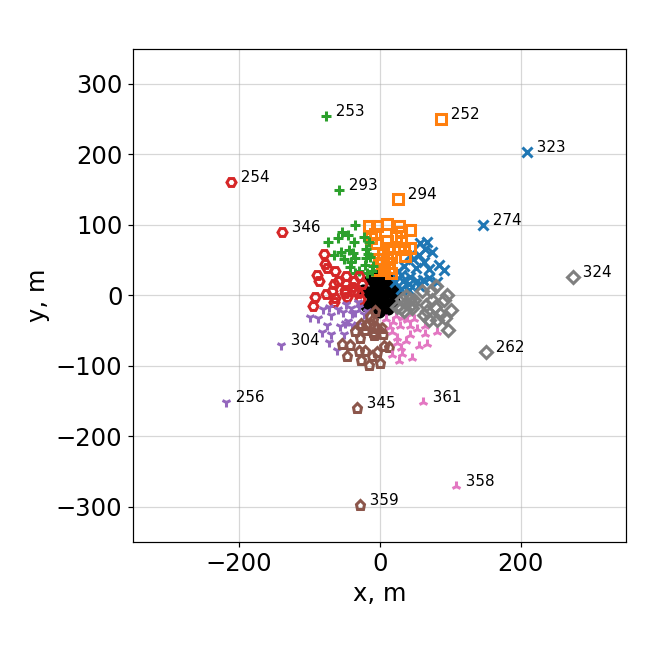

FPGA, Number of core antennas
0 29
1 28
2 29
3 28
4 28
5 28
6 28
7 28
8 28
9 0
10 0

Core Total: 254

Antenna ids by FPGA number
0 [ 76  78  79  81 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 142 143 144 145 146 147 148 149 172 174 178]
1 [  1   2   3   4   5   6   7   9  10  11  34  37  38  40  41  42  43  44
  45  46  47  71  73  74  75  77 274 323]
2 [ 33  35  36  39  65  66  67  68  69  70  72  97  98  99 100 101 102 103
 104 105 106 129 130 131 132 134 139 252 294]
3 [133 135 136 137 138 140 141 161 162 163 164 165 166 167 168 193 194 195
 196 197 198 200 201 202 225 227 253 293]
4 [169 170 171 173 175 176 203 204 205 206 207 208 209 210 226 228 229 231
 232 233 235 236 237 238 239 240 254 346]
5 [151 177 179 180 181 183 211 212 213 214 215 216 217 218 219 220 223 241
 242 244 245 246 248 249 250 251 256 304]
6 [123 124 125 126 128 150 152 153 154 155 156 157 158 159 160 182 184 185
 186 187 189 190 192 221 222 224 345 359]
7 [ 28  30  31  32  54  55  56  57  58  59  

In [13]:
n_sectors = 11
'''
Initialize FPGA assignments as a boolean array (the antenna is in the FPGA or it isn't)
'''
fpga2ant    = np.zeros((n_sectors, len(id_ant)), dtype = bool)

'''
Initialize a veto list
'''
fpga_veto_list = np.zeros((n_sectors, len(id_ant)), dtype = bool)

'''
Define an inner core with 25 m radius
'''
inner_core_radius = 27. # meters
core_radius = 130. # this just bounds the core antennas from outliers. 

'''
First FPGA is for the inner core
'''
fpga2ant[0] = x_ant**2 + y_ant**2 < inner_core_radius**2

'''
The other FPGAs are azimuthal sectors
'''
phi_ant = np.arctan2(y_ant, x_ant)
phi_ant -= 10.* pi/180.
phi_ant = np.mod(phi_ant, 2.*pi) # so it spans 0 - 2*pi instead of -pi to +pi
for i in range(1,9):
    ph0 = (float(i)-1.)*2.*pi/8.
    ph1 = (float(i))*2.*pi/8.
    fpga2ant[i] = np.logical_and(phi_ant>=ph0, phi_ant<ph1)
    fpga2ant[i] = np.logical_and(fpga2ant[i], x_ant**2 + y_ant**2 >= inner_core_radius**2)
    fpga2ant[i] = np.logical_and(fpga2ant[i], x_ant**2 + y_ant**2 <= core_radius**2)

'''
Tweak
'''
fpga2ant[0,143], fpga2ant[6,143] = False, True
fpga2ant[5,211], fpga2ant[6,211] = False, True
fpga2ant[7,120], fpga2ant[6,120] = False, True

fpga2ant[8,25], fpga2ant[7,25] = False, True
fpga2ant[8,27], fpga2ant[7,27] = False, True
fpga2ant[8,51], fpga2ant[7,51] = False, True

fpga2ant[3,216], fpga2ant[4,216] = False, True

fpga2ant[3,162], fpga2ant[4,162] = False, True

fpga2ant[3,135], fpga2ant[0,135] = False, True

fpga2ant[2,101], fpga2ant[0,101] = False, True


'''
Add nearest outliers
'''
fpga2ant[1, 260] = True
fpga2ant[2, 332] = True
fpga2ant[3, 331] = True
fpga2ant[4, 338] = True
fpga2ant[5, 334] = True
fpga2ant[6, 337] = True
fpga2ant[7, 347] = True
fpga2ant[8, 248] = True

'''
Add next nearest outliers
'''
#'''
# this version is for potential trigger participants.
fpga2ant[1, 303] = True
fpga2ant[2, 238] = True
fpga2ant[3, 239] = True
fpga2ant[4, 240] = True
fpga2ant[5, 242] = True
fpga2ant[6, 345] = True
fpga2ant[7, 344] = True
fpga2ant[8, 304] = True
#'''

# this version is for potential veto participants.
'''
fpga2ant[1, 242], fpga_veto_list[1, 242] = True, True
fpga2ant[2, 345], fpga_veto_list[2, 345] = True, True
fpga2ant[3, 344], fpga_veto_list[3, 344] = True, True
fpga2ant[4, 343], fpga_veto_list[4, 343] = True, True
fpga2ant[5, 303], fpga_veto_list[5, 303] = True, True
fpga2ant[6, 238], fpga_veto_list[6, 238] = True, True
fpga2ant[7, 240], fpga_veto_list[7, 240] = True, True
fpga2ant[8, 241], fpga_veto_list[8, 241] = True, True
'''


'''
Plot
'''
cvls = np.linspace(0,1,n_sectors)
idxs = range(len(cvls))
np.random.shuffle(idxs)

rcParams['font.size']=16
sum_core = 0
figure(figsize=(6, 6))
print 'FPGA, Number of core antennas'
print '============================='
for i in range(len(fpga2ant)):
    k = i%len(mrks)
    print i, np.sum(fpga2ant[i])
    sum_core += np.sum(fpga2ant[i])
    if i==0:
        plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, color='k', mew=2, ms=6)#, mc=colors[0])
        plot(x_ant[fpga_veto_list[i]], y_ant[fpga_veto_list[i]], marker=mrks[k], linewidth=0, color='k', mew=2, ms=16, mfc='none')#, mc=colors[0])
    if i>0:
        plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, mfc='none', mew=2, ms=6, color='C%d'%((i-1)%10))#, mc=colors[0])
        plot(x_ant[fpga_veto_list[i]], y_ant[fpga_veto_list[i]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='C%d'%((i-1)%10))#, mc=colors[0])

ant_remain = np.logical_not(np.sum(fpga2ant[0:11,:], axis=0))

#plot(x_ant[ant_remain], y_ant[ant_remain], marker='x', linewidth=0, mfc='none', mew=1, ms=8, color='fuchsia', alpha=0.9)#, mc=colors[0])

for k in range(len(x_ant)):
    if(x_ant[k]**2+y_ant[k]**2>110.**2 and x_ant[k]**2+y_ant[k]**2<350.**2):
        if ant_remain[k] == False:
            text(x_ant[k], y_ant[k], '  %d'%id_ant[k], fontsize=10)
            #text(x_ant[k], y_ant[k], '  %d'%k, fontsize=10)
    
xlim(-350., 350.)
ylim(-350., 350.)
axes().set_aspect('equal')
xlabel('x, m')
ylabel('y, m')
grid(True, alpha=0.5)
tight_layout()
savefig('layout_zoom.pdf')
print ''
print 'Core Total:', sum_core

print ''
print 'Antenna ids by FPGA number'
print '=========================='
for i in range(len(fpga2ant)):
    k = i%len(mrks)
    print i, id_ant[fpga2ant[i]]


<IPython.core.display.Javascript object>


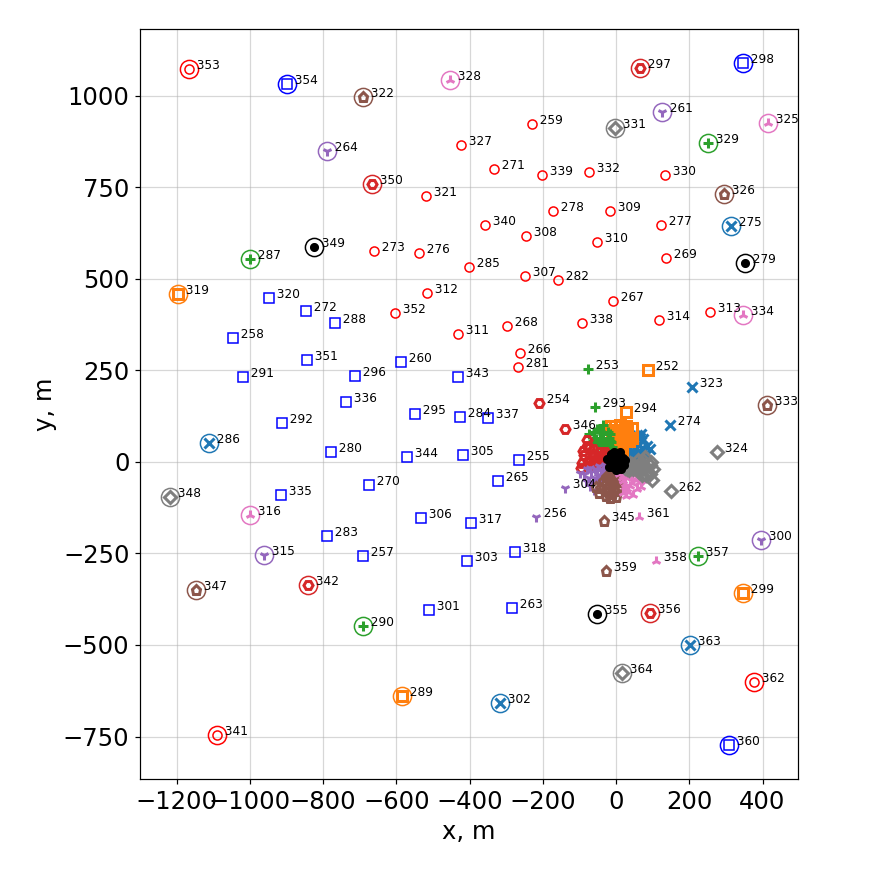

0 32
1 32
2 32
3 32
4 32
5 32
6 32
7 32
8 31
np.sum(fpga2ant[9]) 32
np.sum(fpga2ant[10]) 32



In [14]:
#fpga2ant[10] = np.ones(len(id_ant), dtype=bool)
x0 = -200.
y0 = 565.
Rx = 500.
Ry = 400.
theta = 0. * pi/180.
fpga2ant[9] = ((x_ant-x0)*np.cos(theta)+(y_ant-y0)*np.sin(theta))**2/Rx**2 + ((x_ant-x0)*np.sin(theta)-(y_ant-y0)*np.cos(theta))**2/Ry**2  < 1. 
# Tweak
fpga2ant[9, 238] = False
fpga2ant[9, 239] = False
fpga2ant[9, 240] = False
fpga2ant[9, 323] = False
fpga2ant[9, 245] = False
fpga2ant[9, 311] = False
fpga2ant[9, 307] = False
fpga2ant[9, 295] = False
fpga2ant[9, 303] = False

fpga2ant[9, 295] = True
fpga2ant[9, 307] = True
fpga2ant[9, 245] = True

fpga2ant[9, 321], fpga_veto_list[9, 321] = True, True
fpga2ant[9, 348], fpga_veto_list[9, 348] = True, True
fpga2ant[9, 339], fpga_veto_list[9, 339] = True, True

'''
fpga2ant[9, 297] = False
fpga2ant[9, 303] = False
fpga2ant[9, 304] = False
# Veto
fpga2ant[9, 302] = True
fpga2ant[9, 337] = True
fpga2ant[9, 349]  = True
'''

'''
Variant 1 (w/ southern coverage)
'''
'''
x0 = -325.
y0 = -350.
Rx = 300.
Ry = 750.
theta = 60. * pi/180.
fpga2ant[10] = ((x_ant-x0)*np.cos(theta)+(y_ant-y0)*np.sin(theta))**2/Rx**2 + ((x_ant-x0)*np.sin(theta)-(y_ant-y0)*np.cos(theta))**2/Ry**2  < 1. 
# Tweak
fpga2ant[10, 314] = False

fpga2ant[10, 242] = True
fpga2ant[10, 279] = True
fpga2ant[10, 271] = True
fpga2ant[10, 300] = True
fpga2ant[10, 343] = True
fpga2ant[10, 344] = True
fpga2ant[10, 63]  = True
'''

'''
Variant 2 (w/ no southern coverage)
'''
x0 = -750.
y0 = 100.
Rx = 300.
Ry = 600.
theta = 60. * pi/180.
fpga2ant[10] = ((x_ant-x0)*np.cos(theta)+(y_ant-y0)*np.sin(theta))**2/Rx**2 + ((x_ant-x0)*np.sin(theta)-(y_ant-y0)*np.cos(theta))**2/Ry**2  < 1. 
# Tweak
fpga2ant[10, 242] = False
fpga2ant[10, 299] = False
fpga2ant[10, 272] = False
fpga2ant[10, 249] = True
fpga2ant[10, 243] = True
fpga2ant[10, 285] = True
# Veto
fpga2ant[10, 282], fpga_veto_list[10, 282] = True, True
fpga2ant[10, 340], fpga_veto_list[10, 340] = True, True
fpga2ant[10, 346], fpga_veto_list[10, 346] = True, True

# Main core vetos
# lists added from closest outliers to farthest outliers, 
# spreading the pain
fpga2ant[0, 341], fpga_veto_list[0, 341] = True, True
fpga2ant[1, 349], fpga_veto_list[1, 349] = True, True
fpga2ant[2, 283], fpga_veto_list[2, 283] = True, True
fpga2ant[3, 343], fpga_veto_list[3, 343] = True, True
fpga2ant[4, 342], fpga_veto_list[4, 342] = True, True
fpga2ant[5, 284], fpga_veto_list[5, 284] = True, True
fpga2ant[6, 313], fpga_veto_list[6, 313] = True, True
fpga2ant[7, 314], fpga_veto_list[7, 314] = True, True
fpga2ant[8, 350], fpga_veto_list[8, 350] = True, True

fpga2ant[0, 265], fpga_veto_list[0, 265] = True, True
fpga2ant[1, 286], fpga_veto_list[1, 286] = True, True
fpga2ant[2, 275], fpga_veto_list[2, 275] = True, True
fpga2ant[3, 276], fpga_veto_list[3, 276] = True, True
fpga2ant[4, 322], fpga_veto_list[4, 322] = True, True
fpga2ant[5, 297], fpga_veto_list[5, 297] = True, True
fpga2ant[6, 325], fpga_veto_list[6, 325] = True, True
fpga2ant[7, 298], fpga_veto_list[7, 298] = True, True
fpga2ant[8, 326], fpga_veto_list[8, 326] = True, True

fpga2ant[0, 327], fpga_veto_list[0, 327] = True, True
fpga2ant[1, 272], fpga_veto_list[1, 272] = True, True
fpga2ant[2, 299], fpga_veto_list[2, 299] = True, True
fpga2ant[3, 273], fpga_veto_list[3, 273] = True, True
fpga2ant[4, 328], fpga_veto_list[4, 328] = True, True
fpga2ant[5, 250], fpga_veto_list[5, 250] = True, True
fpga2ant[6, 302], fpga_veto_list[6, 302] = True, True
fpga2ant[7, 308], fpga_veto_list[7, 308] = True, True
fpga2ant[8, 311], fpga_veto_list[8, 311] = True, True

fpga2ant[1, 261], fpga_veto_list[1, 261] = True, True
#fpga2ant[2, 299], fpga_veto_list[2, 299] = True, True
fpga2ant[3, 309], fpga_veto_list[3, 309] = True, True
fpga2ant[7, 305], fpga_veto_list[7, 305] = True, True
fpga2ant[5, 247], fpga_veto_list[5, 247] = True, True
fpga2ant[6, 306], fpga_veto_list[6, 306] = True, True
fpga2ant[4, 281], fpga_veto_list[4, 281] = True, True
#fpga2ant[7, 308], fpga_veto_list[7, 308] = True, True
#fpga2ant[8, 311], fpga_veto_list[8, 311] = True, True



ant_remain = np.logical_not(np.sum(fpga2ant[0:11,:], axis=0))

figure(figsize=(8,8))
print 0, np.sum(fpga2ant[0])
for i in range(1,9):
    k = i%len(mrks)
    print i, np.sum(fpga2ant[i])
    sum_core += np.sum(fpga2ant[i])
    plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, mfc='none', mew=2, ms=6, color='C%d'%((i-1)%10))#, mc=colors[0])
    plot(x_ant[fpga_veto_list[i]], y_ant[fpga_veto_list[i]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='C%d'%((i-1)%10))#, mc=colors[0])

plot(x_ant[fpga2ant[0]], y_ant[fpga2ant[0]], marker=mrks[0], linewidth=0, color='k', mew=3, ms=3)#, mc=colors[0])
plot(x_ant[fpga_veto_list[0]], y_ant[fpga_veto_list[0]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='k')#, mc=colors[0])


plot(x_ant[ant_remain], y_ant[ant_remain], 'x', mew=1, ms=10, alpha=0.5, color='fuchsia')

plot(x_ant[fpga2ant[9]], y_ant[fpga2ant[9]], 'o', ms=6, mew=1, mec='r', mfc='none')
plot(x_ant[fpga_veto_list[9]], y_ant[fpga_veto_list[9]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='r')#, mc=colors[0])

plot(x_ant[fpga2ant[10]], y_ant[fpga2ant[10]], 's', ms=6, mew=1, mec='b', mfc='none')
plot(x_ant[fpga_veto_list[10]], y_ant[fpga_veto_list[10]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='b')#, mc=colors[0])

print 'np.sum(fpga2ant[9])', np.sum(fpga2ant[9])
print 'np.sum(fpga2ant[10])', np.sum(fpga2ant[10])
        
axes().set_aspect('equal')

xlabel('x, m')
ylabel('y, m')
grid('True', alpha=0.5)
tight_layout()


print ''

idx = np.argsort(y_ant)[::-1]
for k in idx:
    if ant_remain[k]==True:
        print '%d, %d, %+1.0f\t%+1.0f'%(k, id_ant[k], x_ant[k], y_ant[k])
        #text(x_ant[k], y_ant[k], '%d'%k, fontsize=10)
    #if(x_ant[k]**2+y_ant[k]**2>120.**2 and (not fpga2ant[9,k]) and (not fpga2ant[10,k])):
    if(x_ant[k]**2+y_ant[k]**2>120.**2):
        #text(x_ant[k], y_ant[k], '  %d'%k, fontsize=8)
        text(x_ant[k], y_ant[k], '  %d'%id_ant[k], fontsize=8)

#print 'fpga_veto_list[0]\n',fpga_veto_list[0]
#print 'fpga_veto_list[0, 341]\n', fpga_veto_list[0, 341]

savefig('layout_broad.pdf')




In [29]:
'''WRITE FPGA ASSIGNMENT AS AN ARRAY'''
fpga_num = np.zeros(352, dtype=int)
veto_array = np.zeros(352, dtype=int)
for k in range(len(id_ant)):
    fpgas_assigned = np.where(fpga2ant[:,k]==True)[0]
    veto = np.where(fpga_veto_list[:,k]==True)[0]
    #print k, id_ant[k], veto, fpgas_assigned
    if len(fpgas_assigned)!=1:
        print '!!!! ERROR !!!!'
        print 'fpgas_assigned has to be length = 1'
        print 'fpgas_assigned =', fpgas_assigned
    fpga_num[k] =  fpgas_assigned[0]
    veto_array[k] = len(veto)
    
# Assign the 40-m dish to FPGA 8
fpga_num[-1] = 8
print fpga_num
print veto_array

print 'len(fpga_num), len(veto_array)', len(fpga_num), len(veto_array)


[ 1  1  1  1  1  1  1  1  1  1  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  7  8  7  7  7  2  1  2  2  1  1  2  1  1  1  1  1  1  1  1  8  8  8  8  8
  8  7  7  7  7  7  7  7  7  7  2  2  2  2  2  2  1  2  1  1  1  0  1  0  0
  8  0  8  8  8  7  7  7  7  7  7  7  7  7  7  7  2  2  2  2  2  2  2  2  2
  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  7  6  6  6  6  6  2  2  2
  2  3  2  3  3  3  3  2  3  3  0  0  0  0  0  0  0  0  6  5  6  6  6  6  6
  6  6  6  6  3  3  3  3  3  3  3  3  4  4  4  0  4  0  4  4  5  0  5  5  5
  6  5  6  6  6  6  6  6  6  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4
  4  5  5  5  5  5  5  5  5  5  5  6  6  5  6  3  4  3  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  2  3  4 10  5 10 10  9 10  5  8 10
  5 10  9  9  9  9 10  9 10  9  1  1  9  9  9  0 10  9  9 10 10  9  1  3 10
  2  3 10 10 10 10  4 10  2  5 10  1 10 10  9  9  9  9  9  9  9  9  5  7  2
 10  9  6  1  8  7  6  9  7  3  9  8  9  6  7 10 10 10  9  9  9  9  4 10 10
  6  8  0  4

In [30]:
FPGA_df = pd.DataFrame(fpga_num)
print FPGA_df.keys()
#FPGA_df.to_excel('FPGA.xlsx', sheet_name='Sheet1',startrow=1, startcol=1, header=False, index=False)

RangeIndex(start=0, stop=1, step=1)


In [31]:
import os
os.system('cp LWA-OVRO-352\ \ 2020MAY05\ new\ numbering.xlsx tmp.xlsx')
tmp_sheet_data = pd.read_excel('tmp.xlsx', sheet_name='Sheet1', header = 3)
tmp_sheet_data['FPGA'] = fpga_num
tmp_sheet_data['veto'] = veto_array
tmp_sheet_data
tmp_sheet_data.to_excel('FPGA.xlsx', sheet_name='Sheet1',startrow=1, startcol=1, header=False, index=False)

In [19]:
print stop_here 

for k in range(len(x_ant)):
    # get FPGAs assignment
    fpgas_assigned = np.where(fpga2ant[:,k]==True)[0]
    veto = np.where(fpga_veto_list[:,k]==True)[0]
    #print veto
    if veto!=fpgas_assigned: print '\n\n\n!!!!FAULT!!!!\n\n\n\n\n\n'
    #print 'LWA-%d'%(id_ant[k]), fpgas_assigned[0], len(veto)
    #fout.print('LWA-%d  %d  %d'%(id_ant[k], fpgas_assigned[0], len(veto)))

fout = open('LWA-OVRO-352_2020MAY05_new_numbering_w_FPGA.txt', 'w')
cc=0
for line in file('LWA-OVRO-352_2020MAY05_new_numbering.txt'):
    if 'LWA' not in line[0:3] and 'antenna' not in line[0:7]:
        fout.write(line)
        print line
    if 'antenna' in line[0:7]:
        fout.write(line[:-2]+'\tFPGA\tveto\n')
        fout.write(line[:-2]+'\tFPGA\n')
    if 'LWA' in line[0:3] and 'LWA-365' not in line:
        fpgas_assigned = np.where(fpga2ant[:,cc]==True)[0]
        veto = np.where(fpga_veto_list[:,cc]==True)[0]
        #print 'LWA-%d'%(id_ant[k]), fpgas_assigned[0], len(veto)
        #print veto
        if veto!=fpgas_assigned: print '\n\n\n!!!!FAULT!!!!\n\n\n\n\n\n'
        new_line = line[:-2]+'\t%d\t%d'%(fpgas_assigned[0], len(veto)) 
        #new_line = line[:-2]+'\t%d'%(fpgas_assigned[0]) 
        print new_line
        fout.write(new_line+'\n')
        cc+=1
    if 'LWA-365' in line:
        #new_line = line[:-2]+'    %d     %d'%(8, -1) 
        new_line = line[:-2]+'    %d'%(8) 
        fout.write(new_line+'\n')
fout.close()

OVRO-LWA antenna coordinates						

updated by dpw 2020MAY05				OVRO lease East boundary is 424m east of 0 and the North boundary is 1141 m north of 0		

	asbuilt					

LWA-1	67.40	74.92	1184.219181	101	container	LMR200	1	0
LWA-2	64.18	65.32	1183.971339	92	container	LMR200	1	0
LWA-3	74.21	61.77	1184.521680	97	container	LMR200	1	0
LWA-4	62.87	47.06	1184.048565	79	container	LMR200	1	0
LWA-5	83.92	42.53	1184.388447	94	container	LMR200	1	0
LWA-6	70.75	36.69	1184.128017	80	container	LMR200	1	0
LWA-7	91.33	35.94	1184.379111	98	container	LMR200	1	0
LWA-9	70.10	24.00	1183.874611	74	container	LMR200	1	0
LWA-10	61.09	21.69	1183.872578	65	container	LMR200	1	0
LWA-11	80.95	19.31	1183.938609	83	container	LMR200	1	0
LWA-12	80.22	12.77	1183.884816	81	container	LMR200	8	0
LWA-13	72.38	5.97	1183.733546	73	container	LMR200	8	0
LWA-14	60.52	5.60	1183.996867	61	container	LMR200	8	0
LWA-15	95.95	0.63	1184.042988	96	container	LMR200	8	0
LWA-17	73.91	-6.20	1183.766348	74	container	LMR200	8	0
LWA-18	92.00	-7.

In [ ]:
print stop_here
